# Final Project Submission

* Student name: **Dennis Trimarchi**
* Student pace: **full time**
* Scheduled project review date/time: **Not yet scheduled**
* Instructor name: **Rafael Cassaro**
* Blog post URL: **Not yet created**


# Motivation
I was motivated to do this project because I have a keen interest in the home values of King's County Washington!!... Oh wait, that's a complete lie. I am doing this project because I am required to review data related to King's County housing, scrub the data, do some analysis, and develop a regression model. With that said, there is a great deal of data available and I am interested in going through a full analysis without being "walked through" the process. I believe that doing this project will give me an idea of my strengths and weaknesses as this stage of my learning as well as give me practice applying data science concepts in Python.

# Outline

I have broken this notebook out into sections. All of my Python work is completed in other notebooks. In all, I have three notebooks. The contents of these notebooks are summarized below:

1. [student_1_Data_cleaning.ipynb](student_1_Data_cleaning.ipynb): Read in King's County housing data. Scrub the data. Handle null values, placeholders and outliers.
2. [student_2_EDA_Questions.ipynb](student_2_EDA_Questions.ipynb): Start to look at contents of each feature. Formulate three questions, investigate them, and provide an answer/conclusion to those questions.
3. [student_3_Model.ipynb](student_3_Model.ipynb): Create a model. Iteratively improve the model. Provide and final model and perform model validation.

This readme contains sections that summarize the work from the notebooks above as well as provide Recommendations / Conclusions and links to additional project deliverables.

# Import Data and Scrub

See details in [student_1_Data_cleaning.ipynb](student_1_Data_cleaning.ipynb) if desired. A summary of the actions taken for each feature is provided at the top of the notebook.

In total I removed **634** out of **21597** rows of data during Data Cleaning. I also did a little EDA with the creation of `zip_981` feature.

My process was to first look at the datatype and convert it if needed. Second, to look for Null values. Third, to look for outliers by running feature histograms and scatterplots against the target. However, in trying to convert some feature datatypes, the null values became apparent on their own. Below is a summary of the data cleaning actions for each feature:

# EDA & Questions

See details in [student_2_EDA_Questions.ipynb](student_2_EDA_Questions.ipynb).

When I initially looked at the data during the Data Scrubbing phase, I thought about the following questions:

1. *Are waterfront properties significantly more expensive than non-waterfront?*
2. *Are newer homes more expensive (yr_built)?*
3. *Is there a particular location or locations where I can categorize homes as more expensive?*



## Question 1 - waterfront view properties

*Are waterfront properties significantly more expensive than non-waterfront?*

Unfortunately, when I thought of this question, I did not realize that the DataFrame would contain so few records (only 98) for waterfront property. I did an analysis for the sake of the question anyway.

- Correlation Coefficient **0.015** - Weak positive correlation with price.
- Regression p-value **0.00** - Indicates that the feature is statistically significant (non-zero coefficient).
- Regression model coefficient **6.05e05** - Indicates that having a view of the waterfront results in an increase of about $600K for the price.
- R-Squared **0.021** - Indicates that the feature only accounts for 2% of the variation in price for the dataset.


I initially thought that the regression coefficient was ridiculous, but the data does seem to support it. For example: 
- Homes with waterfront: median price = 1,150,000
- Homes without waterfront: median price = 445,000

The difference in median value is over 700K. So, the regression coefficient isn't that surprising considering the median values of our dataset.

The very low R-Squared makes perfect sense because home prices are based on many other factors and waterfront view is weakly correlated with price. 

#### Answer
Yes. There is a positive correlation and the p-value is less than 0.05. It seems obvious that being a waterfront property would increase value. However, with such a small dataset representing waterfront view, I would want to gather more data (or fill in the missing data) before trusting this result. Additionally, the Seattle area has a lot of waterfront, and it's possible that the abundance and quality of the waterfront would dilute any impact this feature has. 

## Question 2 - newer homes

*Are newer homes more expensive?*

The scatterplot of yr_built vs price didn't appear to have any kind of relationship at first. With a coefficient of 0.053, there is almost no correlation between yr_built and price. However, on the scatterplot for yr_built vs price, there appeared to be a slight positive relationship in more recent years. I created a feature called `built_last_20_years` as a categorical feature which represents homes built in the last 20 years of the dataset (after 1995).

- Correlation Coefficient **0.13** - Indicates a weak positive relationship with price. Better than yr_built.
- Regression p-value **0.00** - Indicates that the feature is statistically significant (non-zero coefficient).
- Regression model coefficient **8.31e4** - Indicates that a home built in the last 20 years will result in a price increase of $83K.
- R-Squared **0.016** - Indicates that the feature only accounts for 1.6% of the variation in price of the dataset.

The regression coefficient supports the data below where the difference in median price is about 70K:
- Not built in last 20 years: median price = 430000.0
- Built in last 20 years: median price = 497475.0

#### Answer

Yes. If you define "newer homes" as homes built in the last 20 years, then there is a positive correlation with price and it is significant with a p-value < 0.05.

## Question 3 - Where are expensive homes located?

*Is there a particular location or locations where I can categorize homes as more expensive?*

I created a scatterplot of latitude vs. longitude with the hue representing price. This creates a nifty looking map of the area with darker color representing higher price. It looks like areas immediately east of downtown Seattle - on the east side of lake washington have a higer prices. Also areas to the north look to be more expensive in general.

1. Calculate distance between two geographical points
   - I defined a function to provide the distance in miles between two sets of lat/long coordinates. 
   - For a given location, I could now calculate the distance from that location to all homes in the dataset. 
2. Search for a location where distances from that location is hightly correlated with price
   - Iterated through lat and long points in the region of the dataset. 
   - Calculated distances to that point for every home.
   - Calculated correlation of those distances with price.
3. Look at map of the location returned
   - The function returned a point just northeast of Bellvue, WA. This is an area with many expensive homes, so the result is not a surprise. 
   - The correlation coefficient with price that the function returned was -0.49 which is better than lat or long individually.
   - The negative correlation makes sense because as distance from Bellvue increases, price decreases.
4. Create a new feature called dist_from_Bellvue
   - Created a new feature with the distance from Bellvue in miles for each home. 

For the new feature:

- Correlation Coefficient **-0.49** - Moderate negative correlation with price.
- Regression p-value **0.00** - Indicates that the feature is statistically significant (non-zero coefficient).
- Regression model coefficient **-2.26e04** - Indicates that for every mile away from Bellvue, a home's price decreases by about $22K.
- R-Squared **0.237** - Indicates that the feature accounts for 23.7% of the variation in price for the dataset. This is pretty great.

#### Answer

Yes. There is a point (47.638, -122.17) just northeast of Bellvue, WA that is correlated with higher prices. The map of the area shows many expensive homes near there. One thing to consider is that if there were other clear areas with clusters of expensive homes, I would want to create new features to handle those locations as well.

## EDA Summary 

There are some high feature correlations with price... But unfortunately, the dataset is overloaded with independent variables that aren't actually independent! They have high correlations with eachother. Nevertheless I decided to keep these features for now and deal with them in the modeling section. I also decided to **drop all features with <0.10 correlation with price**.

- Dropped Features
   - condition
   - yr_built
   - yr_renovated
   - zipcode
   - long
   - zip_981


- Top 5 features correlated with price
   - grade
   - sqft_living
   - sqft_living15
   - sqft_above
   - log_dist_from_Bellvue
 

# Model

The notebook containing this work is [student_3_Model.ipynb](student_3_Model.ipynb). 


## Collinearity

Because collinearity was a major part of this particular set of features, I decided to put the features together into groups that were highly correlated with eachother. I would only be able to pick one feature from each group during Iterative Modeling. See the groups below:

**collinear groups of features:**

- **Group 1**
  - sqft_living
  - ~~sqft_living15~~ Dropped. Highly correlated with sqft_living. Does not add much.
  - ~~sqft_above~~ Dropped. It is basically the same thing as sqft_living
  - bedrooms
  - bathrooms
  - grade

- **Group 2**
  - sqft_lot
  - ~~sqft_lot15~~ Dropped. Doesn't add much. Slightly lower correlation with price.
  
- **Group 3**
  - lat
  - dist_from_Bellvue
  - log_dist_from_Bellvue
  
## Train / Test Split

I performed a train/test split using Scikit Learn's train_test_split function with an 80/20 split. I used the training set to build my model.

## Feature Selection

I used scikit learn's recursive feature elimination to provide a list of ranked features. But in the end, I decided to iteratively add / remove features and run a regression using OLS in Statsmodels.

### Rundown of model iterations

I ran the regression multiple times with different features added and removed. I've included the iterations summary below in the case of interest.

1. All features: When every feature was included, adj R^2 = 0.688 but there were a bunch of collinear features.
2. Removed all lowest ranked collinear features from the recursive feature elimination: *bathrooms, bedrooms, sqft_living, dist_from_Bellvue, lat*: adj R^2 = 0.622. All p-values are less than 0.05.
3. Removed *waterfront*: adj R^2 = 0.606. Even though I think this is an important feature, the data size is so small that I want to take it out of the model for now.
4. Swapped out *grade* with *sqft_living*: I feel that sqft_living is more generic since grade depends on the county rating system. p-value for *sqft_lot* went up to 0.602 and adj R^2 = 0.620.
5. Removed *sqft_lot* because of p-value: adj R^2 is still 0.620.
6. Removed *has_basement*: adj R^2 only changed to 0.619
7. Removed *built_last_20_yrs*: adj R^2 only changed to 0.617
8. Added back in *built_last_20_yrs* and removed *floors*: adj R^2 = 0.614
9. Removed *built_last_20_yrs* again: adj R^2 = 0.614 no change.
10. Swapped *log_dist_from_Bellvue* for *dist_from_Bellvue*: I like that the latter is not transformed. adj R^2 = 0.614. No change.
11. Added back in *waterfront*: adj R^2 = 0.631. Even better than the first non-collinear model.
12. Removed *waterfront*: adj R^2 = 0.614 again. Alas, I still wasn't comfortable including it.
13. Swapped back *log_dist_from_Bellvue* in place of *dist_from_Bellvue*: I do not like that dist_from_Bellvue has a greater negative impact for distances far away from Bellvue than the log version: adj R^2 = 0.614. No change there.

## Final Model

Price is a function of sqft_living and dist_from_Bellvue. Collinearity in this model is very small as the correlation between sqft_living and log_dist_from_Bellvue is -0.17.
                
$$price = 202.80*sqft\_living - 196,800*\ln(dist\_from\_Bellvue) + 550,300$$

* P-values in the model for both independent variables are < 0.05.
* P(F-statistic) of the model is < 0.05.


OLS Model:


<img src="OLS_Model.png" style="width: 500px;"/>

## Model Validation

### MSE/RMSE for Train and Test sets

I decided to use scikit learn's LinearRegression function to get my residuals. Luckly, when I ran the regression with scikit learn, my coefficients were identical. Phew...

|   -   | Mean Squared Error | Root Mean Squared Error |
|:-----:|:------------------:|:-----------------------:|
| Train |      3.048e+10     |          174589         |
|  Test |      3.268e+10     |          180781         |



### K-Fold Cross Validation

Cross Validation 5 divisions

|  Mean Squared Error   | Root Mean Squared Error |
|:---------------------:|:-----------------------:|
| (average/5) 3.098e+10 |   (average/5) 176031    |
|      3.105e+10        |          176234         |
|      3.067e+10        |          175141         |
|      3.152e+10        |          177559         |
|      3.232e+10        |          179783         |
|      2.935e+10        |          171321         |

The MSE for Cross Validation provides a better estimation of the MSE for my model than the train/test values (although they are very similar). As the MSE is very large, I looked at the RMSE as well. The RMSE can be directly compared to the target variable, in this case price. This means that the standard deviation of my model errors is approximately $176K. This sounds pretty bad, but the R^2 of 0.614 indicates that the model only explains 61\% of the price variable. 

In [3]:
import numpy as np

In [37]:
np.log(10)

2.302585092994046

In [33]:
home_size = 4000

dist_from_Bellvue = []
log_dist_from_Bellvue = []

dist = np.linspace(0.1,100,500)

for dist_from in dist:
    price1 = (208.52*home_size) - (18800*dist_from) + 304100
    price2 = (202.7969*home_size) - (196800*np.log(dist_from)) + 550300
    dist_from_Bellvue.append(price1)
    log_dist_from_Bellvue.append(price2)

In [30]:
#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#contexts available: poster, paper, talk, notebook
sns.set_context('paper')

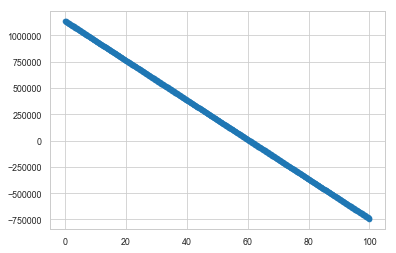

In [34]:
plt.scatter(dist, dist_from_Bellvue)

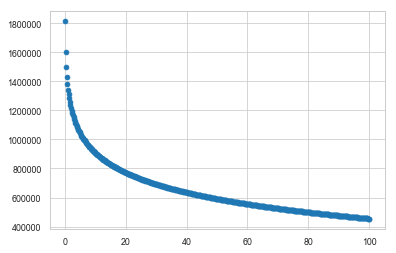

In [35]:
plt.scatter(dist, log_dist_from_Bellvue)

 

# Outline
* [Learning Stuff Section](#Learning-Stuff)

# Notebook
* Needs to be clean and organized
    * markdowns
    * introduction
        * outline
            * table of contents if possible
    * clear comments
    
    
* In order you should have
    * introduction
    * obtain section
    * scrubbing
        * handling null values
        * handling placeholders
        * handling outliers
        * etc
    * eda section
        * questions clearly stated
            * question
            * investigation + eda
            * conclusions + insights + recommendation
        * eda summary
    * modeling
        * model
        * iterate by using those results to make a new model
        * repeat 
        * final model - **do not have multicollinearity**
            * **DON'T**
                * have multicollinearity
                * pvalues > 0.05
                * P(F) > 0.05
            * your price equation written out 
                * $price = 23\text{sqft_living} + \dots$
                * writing a latex equation
                
                $$p = \beta_1 f_1 + \beta_2 f_2 + \dots$$
                
                $$p = 1232 sqftliving + 3232 grade + \dots$$
                
            * final model sm.OLS.summary()
            * model validation
                * train test split
                * cross validation in sklearn using
                * show the scores and interpret them
    * recommendations
    * conclusion
    * further work



# Slideshow
* 6-8/10 slides
* not too text heavy
* good visual aids
* model summary for features
    * insights
* recommendations
* further investigation
* thank you slide



# README.md
Either
    * convert notebook
or
    * intro
    * outline
    * notebooks used
    * conclusion
        * final model equation



# Video
* present your project
* upload to youtube, google drive or other cloud service



# Blog
* 800 words
* add some visuals
* have fun with it

